In [ ]:
 # importing lib.
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv("netfilixdataset12.csv", lineterminator='\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
 # viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
        9827 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.1+ KB


In [6]:
 # exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
# for duplicated values
df.duplicated().sum()

np.int64(0)

 • Exploration Summary
 • we have a dataframe consisting of 9827 rows and 9 columns.
 • our dataset looks a bit tidy with no NaNs nor duplicated values.
 • Release_Date column needs to be casted into date time and to extract only the 
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
 • there is noticable outliers in Popularity column
 • Vote_Average bettter be categorised for proper analysis.
 # Data Cleaning
 Casting Release_Date column and extracing year value

In [9]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


C:\Users\Sumit Saini\AppData\Local\Temp\ipykernel_25264\4222673052.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'])


In [10]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#  Dropping Overview, Original_Languege and Poster-Url

In [12]:
# droping the columns
cols = ['Overview','Original_Language','Poster_Url\r']
df.drop(cols,axis = 1,inplace = True)

In [13]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


 # categorizing 'Vote_Average' column**
 We would cut the Vote_Average values and make 4 categories: 'popular' 'average''
 below_avg' 'not_popular' to describe it more using 'catigorize_col()' function
 provided above.

In [29]:
def catigorize_col(df,col,labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges ,labels = labels , duplicates = 'drop')
    return df

In [30]:
 # define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [31]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [32]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_avg,Thriller
3,2021,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [34]:
df.dropna(inplace = True)

In [35]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# we'd split genres into a list and then explode our dataframe to have only onegenre per row for ezch movie

In [36]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


In [37]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 749.6+ KB


# Data Visualization

In [39]:
sns.set_style('whitegrid')

# Q1: What is the most frequent genre in the dataset?

In [40]:
 # showing stats. on genre column
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

visualizing genre column

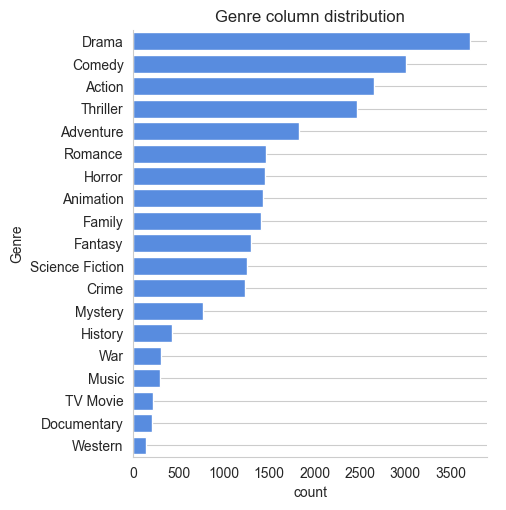

In [41]:
sns.catplot(y = "Genre",data = df,kind= 'count',order = df['Genre'].value_counts().index, color = '#4287f5')
plt.title('Genre column distribution')
plt.grid()
plt.show()


we can notice from the above visual that 
Drama genre is the most frequent genre
 in our dataset and has appeared more than 14% of the times among 19 other
 genres.

 # Q2: What genres has highest votes ?

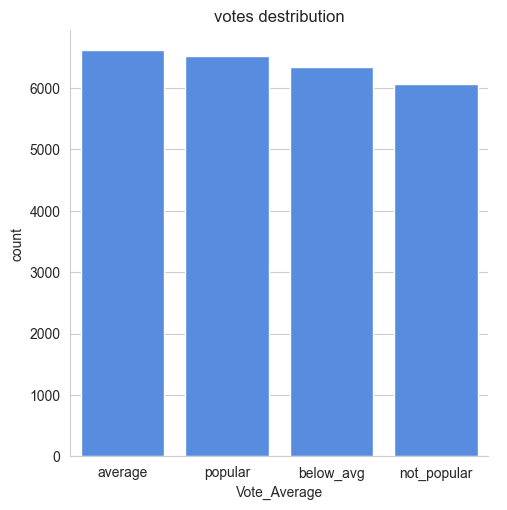

In [42]:
 # visualizing vote_average column
sns.catplot(x = "Vote_Average",data = df,kind= 'count',order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('votes destribution')
plt.show()

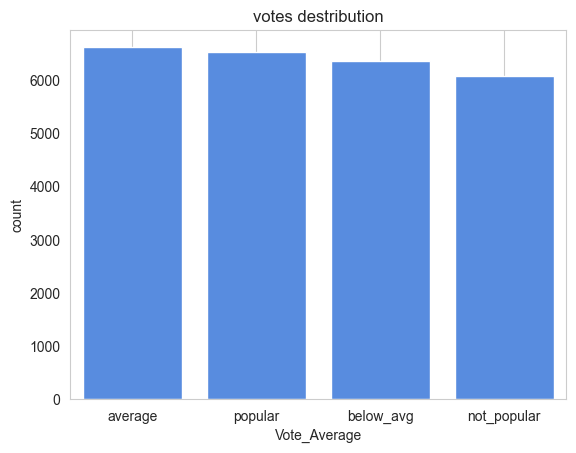

In [43]:
sns.countplot(x = "Vote_Average",data = df,order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('votes destribution')
plt.grid()
plt.show()

# Q3: What movie got the higest popularity ? what's it's genre ?

In [48]:
 # checking max popularity in dataset
df[df['Popularity']  == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


# Q4: What movie got the lowest popularity ? what's it's genre ?

In [49]:
 # checking min popularity in dataset
df[df['Popularity']  == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984,Threads,13.354,186.0,popular,War
25549,1984,Threads,13.354,186.0,popular,Drama
25550,1984,Threads,13.354,186.0,popular,Science Fiction


# Q5: Which year has the most filmmed movies?

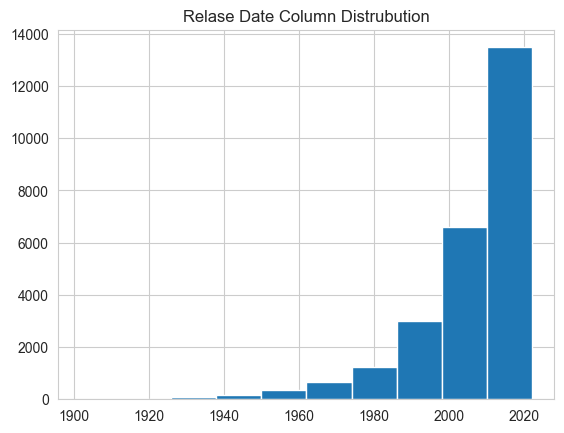

In [50]:
df['Release_Date'].hist()
plt.title("Relase Date Column Distrubution")
plt.show()

 # Q1: What is the most frequent genre in the dataset?
 Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.
# Q2: What genres has highest votes ?
 we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of        movies popularities.
 
# Q3: What movie got the 'highest' popularity ? what's its Action , genre ?
 Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Adventure and Sience Fiction .
 
# Q3: What movie got the lowest popularity ? what's its genre ?
 The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history`.
 
# Q4: Which year has the most filmmed movies?
 year 2020 has the highest filmming rate in our dataset.